# White Dwarf Sensitivity Analysis

In [1]:
import white_dwarf
import numpy as np
import matplotlib.pyplot as plt

default_inputs = white_dwarf.inputs

### Copper-Stainless Gap

In [2]:
inputs = white_dwarf.inputs
gap_sizes = np.linspace(0, 3e-3, 10)
data = []

max_copper_T = []
max_thermal_stress = []

for i in range(len(gap_sizes)):
    print(f"i = {i}, gap size = {gap_sizes[i]*1e3} mm")
    inputs["copper_stainless_gap"] = gap_sizes[i]
    data.append(white_dwarf.get_data(inputs = inputs))
    
    #print(data[i]["T"])
    
    max_copper_T.append(max( np.array(data[i]["T"])[:,2] ))
    max_thermal_stress.append(max( np.array(data[i]["sigma_t_thermal"])[:,1] ))

i = 0, gap size = 0.0 mm
Loaded 1921 thermo species
Loaded 1031 propellants


C:\Users\Daniel\OneDrive - University of Cambridge\Cambridge\CUSF\Github Repositories\White-Dwarf-Cooling\white_dwarf.py:124: UserWarning: The area ratio provided (2.1547002604016487) is outside of the range of available data. Maximum available is 54.623, minimum is 3.678. Will use a 15 degree cone instead.
  xs, ys = bam.rao.get_rao_contour(r_c = Rc,
C:\Users\Daniel\OneDrive - University of Cambridge\Cambridge\CUSF\Github Repositories\White-Dwarf-Cooling\white_dwarf.py:245: UserWarning: More than one wall is present. Thermal stresses calculations will ignore any incompatibility in different thermal expansions.
  cooling_data = engine.steady_heating_analysis()
C:\Users\Daniel\anaconda3\lib\site-packages\cusfbamboo\engine.py:1251: RuntimeWarning: divide by zero encountered in double_scalars
  results["sigma_t_pressure"][i][j] = (p_l - p_g) * D / (2 * t_w)


i = 1, gap size = 0.3333333333333333 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 2, gap size = 0.6666666666666666 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 3, gap size = 1.0 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 4, gap size = 1.3333333333333333 mm
Loaded 1921 thermo species
Loaded 1031 propellants


C:\Users\Daniel\anaconda3\lib\site-packages\cusfbamboo\hx.py:84: UserWarning: ReDh < 3500 in cooling channels: Flow is in between the laminar and turbulent regions - blending will be used. Constant wall temperature is assumed for laminar Nusselt number.
  R = self.Rdx(self.state[i]))


i = 5, gap size = 1.6666666666666665 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 6, gap size = 2.0 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 7, gap size = 2.333333333333333 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 8, gap size = 2.6666666666666665 mm
Loaded 1921 thermo species
Loaded 1031 propellants
i = 9, gap size = 3.0 mm
Loaded 1921 thermo species
Loaded 1031 propellants


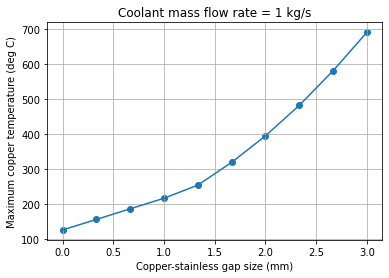

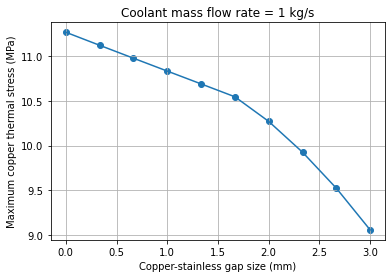

In [3]:
plt.plot(gap_sizes*1e3, np.array(max_copper_T) - 273.15)
plt.scatter(gap_sizes*1e3, np.array(max_copper_T) - 273.15)
plt.grid()
plt.xlabel("Copper-stainless gap size (mm)")
plt.ylabel("Maximum copper temperature (deg C)")
plt.title(f"Coolant mass flow rate = {default_inputs['mdot_coolant']} kg/s")
plt.savefig("img/sensitivity/x-gap-y-temp.svg")
plt.show()

plt.plot(gap_sizes*1e3, np.array(max_thermal_stress)/1e6)
plt.scatter(gap_sizes*1e3, np.array(max_thermal_stress)/1e6)
plt.grid()
plt.xlabel("Copper-stainless gap size (mm)")
plt.ylabel("Maximum copper thermal stress (MPa)")
plt.title(f"Coolant mass flow rate = {inputs['mdot_coolant']} kg/s")
plt.savefig("img/sensitivity/x-gap-y-stress.svg")
plt.show()

### Coolant Mass Flow Rate

In [4]:
inputs = white_dwarf.inputs
inputs["copper_stainless_gap"] = 2e-3
mdot_coolant = np.linspace(1.4, 0.3, 10)
data = []

max_copper_T = []
max_thermal_stress = []
water_outlet_T = []
dp = []

for i in range(len(mdot_coolant)):
    print(f"i = {i}, mdot_coolant = {mdot_coolant[i]} kg/s")
    inputs["mdot_coolant"] = mdot_coolant[i]
    data.append(white_dwarf.get_data(inputs = inputs))
    
    max_copper_T.append(max( np.array(data[i]["T"])[:,2] ))
    max_thermal_stress.append(max( np.array(data[i]["sigma_t_thermal"])[:,1] ))
    water_outlet_T.append(data[i]["T_coolant"][-1])
    dp.append(data[i]["p_coolant"][0] - data[i]["p_coolant"][-1])

i = 0, mdot_coolant = 1.4 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants


C:\Users\Daniel\OneDrive - University of Cambridge\Cambridge\CUSF\Github Repositories\White-Dwarf-Cooling\white_dwarf.py:124: UserWarning: The area ratio provided (2.1547002604016487) is outside of the range of available data. Maximum available is 54.623, minimum is 3.678. Will use a 15 degree cone instead.
  xs, ys = bam.rao.get_rao_contour(r_c = Rc,
C:\Users\Daniel\OneDrive - University of Cambridge\Cambridge\CUSF\Github Repositories\White-Dwarf-Cooling\white_dwarf.py:245: UserWarning: More than one wall is present. Thermal stresses calculations will ignore any incompatibility in different thermal expansions.
  cooling_data = engine.steady_heating_analysis()
C:\Users\Daniel\anaconda3\lib\site-packages\cusfbamboo\engine.py:1251: RuntimeWarning: divide by zero encountered in double_scalars
  results["sigma_t_pressure"][i][j] = (p_l - p_g) * D / (2 * t_w)


i = 1, mdot_coolant = 1.2777777777777777 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 2, mdot_coolant = 1.1555555555555554 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants


C:\Users\Daniel\anaconda3\lib\site-packages\cusfbamboo\hx.py:84: UserWarning: ReDh < 3500 in cooling channels: Flow is in between the laminar and turbulent regions - blending will be used. Constant wall temperature is assumed for laminar Nusselt number.
  R = self.Rdx(self.state[i]))


i = 3, mdot_coolant = 1.0333333333333332 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 4, mdot_coolant = 0.9111111111111111 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 5, mdot_coolant = 0.7888888888888889 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 6, mdot_coolant = 0.6666666666666667 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants


C:\Users\Daniel\anaconda3\lib\site-packages\cusfbamboo\hx.py:84: UserWarning: ReDh < 2300 in cooling channels: Laminar flow relations will be used. Constant wall temperature is assumed for Nusselt number.
  R = self.Rdx(self.state[i]))


i = 7, mdot_coolant = 0.5444444444444445 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 8, mdot_coolant = 0.4222222222222223 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants
i = 9, mdot_coolant = 0.3 kg/s
Loaded 1921 thermo species
Loaded 1031 propellants


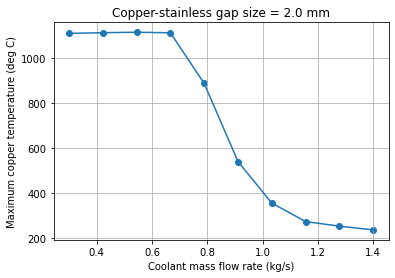

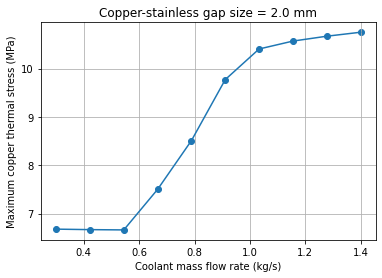

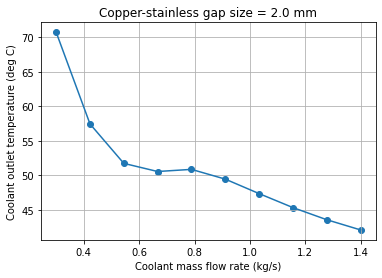

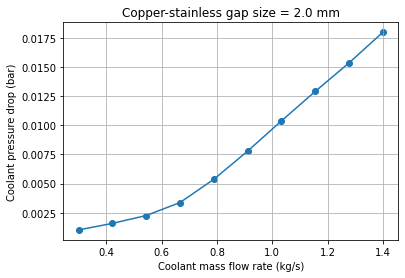

In [5]:
plt.plot(mdot_coolant, np.array(max_copper_T) - 273.15)
plt.scatter(mdot_coolant, np.array(max_copper_T) - 273.15)
plt.grid()
plt.xlabel("Coolant mass flow rate (kg/s)")
plt.ylabel("Maximum copper temperature (deg C)")
plt.title(f"Copper-stainless gap size = {default_inputs['copper_stainless_gap']*1e3} mm")
plt.savefig("img/sensitivity/x-massflow-y-temp.svg")
plt.show()

plt.plot(mdot_coolant, np.array(max_thermal_stress)/1e6)
plt.scatter(mdot_coolant, np.array(max_thermal_stress)/1e6)
plt.grid()
plt.xlabel("Coolant mass flow rate (kg/s)")
plt.ylabel("Maximum copper thermal stress (MPa)")
plt.title(f"Copper-stainless gap size = {default_inputs['copper_stainless_gap']*1e3} mm")
plt.savefig("img/sensitivity/x-massflow-y-stress.svg")
plt.show()

plt.plot(mdot_coolant, np.array(water_outlet_T) - 273.15)
plt.scatter(mdot_coolant, np.array(water_outlet_T)- 273.15)
plt.grid()
plt.xlabel("Coolant mass flow rate (kg/s)")
plt.ylabel("Coolant outlet temperature (deg C)")
plt.title(f"Copper-stainless gap size = {default_inputs['copper_stainless_gap']*1e3} mm")
plt.savefig("img/sensitivity/x-massflow-y-Tcout.svg")
plt.show()

plt.plot(mdot_coolant, np.array(dp)/1e5)
plt.scatter(mdot_coolant, np.array(dp)/1e5)
plt.grid()
plt.xlabel("Coolant mass flow rate (kg/s)")
plt.ylabel("Coolant pressure drop (bar)")
plt.title(f"Copper-stainless gap size = {default_inputs['copper_stainless_gap']*1e3} mm")
plt.savefig("img/sensitivity/x-massflow-y-dp.svg")
plt.show()